# Russian Wholesale Electricity Market

## Context

On 1st September 2006, the Wholesale Electricity and Capacity Market was launched in Russia. The nodal pricing system is applied to the wholesale market: each node gets an individual price value for a certain hour. For the price analysis and forecast problem, the analyst uses the weighted average of the nodal prices for certain territory such as price zone, united energy system and others. More details about the Wholesale Electricity and Capacity Market of Russia you will find in my latest paper The Three-Headed Dragon: Electricity, Trading, Analysis.﻿

## Content

The data files include

* the weighted average of the nodal day ahead prices for the European and Siberian price zones of the market;
* the weighted average of the nodal day ahead prices for six United Energy Systems: NorthWest, Centre, Ural, South, Middle Volga and Siberia;
* the day ahead scheduled volume for the European and Siberian price zones;
* the weighted average of the nodal intraday prices for three United Energy Systems: NorthWest, Centre and Siberia

Time stamps are in Europe/Moscow timezone.

For more details, please see [The Three-Headed Dragon: Electricity, Trading, Analysis](https://www.mbureau.energy/articles/three-headed-dragon-electricity-trading-analysis-first-head-electricity).

## CHALLENGES
Electricity is a commodity capable of being bought, sold, and traded. All nations are moving towards a
Deregulated Electricity Market System where the competitors are allowed to buy and sell electricity by
permitting market participants to invest in power plants and transmission lines. Also, it offers a broader
range of renewable energy options - the need of the hour.
This system has paved the way for Data Scientists/ Machine Learning Engineers to extensively participate in
the growing dynamic energy management systems. The spectrum includes predicting energy requirements,
prices, network grid analysis, etc.

## PROJECT DESCRIPTION: WHOLESALE ELECTRICITY MARKET DATASET
Addressing the high demand for power, on the 1st of September 2006, the Wholesale Electricity and
Capacity Market was launched in Russia. Now, both the price and electricity consumption forecast problem
is highly important on the Wholesale Electricity Market. Thus, the questions:

* What price should we expect tomorrow, next week, next year?
* What electricity consumption should we expect tomorrow, next week, next year?

It is important to employ analysts, ML Engineers, and Data Scientists to extract patterns from data to derive
insights that could help different aspects of the operation.

Reference : https://machinelearningmastery.com/autoregression-models-time-series-forecasting-python/

# Exploratory Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import glob
import os

sns.set()

In [2]:
#fetch files from directory
pathcwd = os.getcwd()
path = pathcwd + "/Project data/Russian Electricity Data 2006"
files = glob.glob(path + "/*.csv")
files

['/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv',
 '/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv']

In [3]:
for file in files:
    print(file)

/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_intraday_price.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_PZ_dayahead_price_volume.csv
/Users/user/Documents/Data Science/Hamoye/Project data/Russian Electricity Data 2006/RU_Electricity_Market_UES_dayahead_price.csv


In [64]:
UES_intraday_price = pd.read_csv(files[0])
PZ_dayahead_price_volume = pd.read_csv(files[1])
UES_dayahead_price = pd.read_csv(files[2])
UES_intraday_price.head()


,timestep,UES_Northwest,UES_Siberia,UES_Center
0,2017-01-01 00:00,767,918,982
1,2017-01-01 01:00,675,889,848
2,2017-01-01 02:00,717,933,920
3,2017-01-01 03:00,683,947,885
4,2017-01-01 04:00,633,934,829


In [5]:
def data_details(data):
    head = data.head()
    info = data.info()
    describe = data.describe()
    any_null = data.isnull().any()
    
    return (print(head),
                  print(info), 
                  print(describe),
                  print(any_null))

In [6]:
data_details(UES_intraday_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24072 entries, 0 to 24071
Data columns (total 4 columns):
timestep         24072 non-null object
UES_Northwest    24072 non-null int64
UES_Siberia      24072 non-null int64
UES_Center       24072 non-null int64
dtypes: int64(3), object(1)
memory usage: 752.4+ KB
           timestep  UES_Northwest  UES_Siberia  UES_Center
0  2017-01-01 00:00            767          918         982
1  2017-01-01 01:00            675          889         848
2  2017-01-01 02:00            717          933         920
3  2017-01-01 03:00            683          947         885
4  2017-01-01 04:00            633          934         829
None
       UES_Northwest   UES_Siberia    UES_Center
count   24072.000000  24072.000000  24072.000000
mean      990.692921    794.586200   1210.754944
std       316.709637    259.351579    356.775935
min         0.000000      0.000000      0.000000
25%       792.000000    693.000000    967.000000
50%       991.000000    856.

(None, None, None, None)

## 0 Minimum Values ????
Notice that the minimum values for all three regions is Zero (0). Since we are talking about prices it is mostly unlikely that there are hours/periods where electricity is free. So we assume these are errors.

Or does that mean there was no power supply within those hours?? THEM DEY TAKE LIGHT FOR RUSSIA??????

Let's count the number of Zero values in each region.


After some research, I found that: 

`"If a consumer leaves the price cells empty, it declares its intention to buy electricity at any market price. This type of bid is called a price independent bid. Such bids reflect inelastic demand, as discussed earlier. In 2017 in Russia 99.5% of bids were price independent."`

This explains why there are lots of zero values, especially in 2017

In [7]:
count = 0
count1 = 0
count2 = 0
for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        count += 1
    if i[2] == 0:
        count1 += 1
    if i[3] == 0:
        count2 += 1
print (f"There are {count} - 0 values in UES_Northwest")
print (f"There are {count1} - 0 values in UES_Siberia")
print (f"There are {count2} - 0 values in UES_Center")

There are 63 - 0 values in UES_Northwest
There are 642 - 0 values in UES_Siberia
There are 73 - 0 values in UES_Center


In [8]:
# print timestamp of each zero values

for row, i in UES_intraday_price.iterrows():
    if i[1] == 0:
        print (i)
    

timestep         2017-01-26 00:00
UES_Northwest                   0
UES_Siberia                   309
UES_Center                      0
Name: 600, dtype: object
timestep         2017-01-26 01:00
UES_Northwest                   0
UES_Siberia                   318
UES_Center                      1
Name: 601, dtype: object
timestep         2017-04-16 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      1
Name: 2543, dtype: object
timestep         2017-04-21 01:00
UES_Northwest                   0
UES_Siberia                   304
UES_Center                      0
Name: 2641, dtype: object
timestep         2017-04-28 02:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2810, dtype: object
timestep         2017-05-01 03:00
UES_Northwest                   0
UES_Siberia                   381
UES_Center                      0
Name: 2883, dtype: object
timestep         2017-05-03 04

timestep         2018-11-18 02:00
UES_Northwest                   0
UES_Siberia                   833
UES_Center                    540
Name: 16466, dtype: object
timestep         2018-11-18 03:00
UES_Northwest                   0
UES_Siberia                   834
UES_Center                    538
Name: 16467, dtype: object
timestep         2019-05-12 04:00
UES_Northwest                   0
UES_Siberia                  1032
UES_Center                      0
Name: 20668, dtype: object
timestep         2019-07-02 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      3
Name: 21911, dtype: object
timestep         2019-08-26 03:00
UES_Northwest                   0
UES_Siberia                   227
UES_Center                      0
Name: 23211, dtype: object
timestep         2019-09-10 02:00
UES_Northwest                   0
UES_Siberia                   117
UES_Center                      0
Name: 23570, dtype: object
timestep         2019-

In [9]:

for row, i in UES_intraday_price.iterrows():
    if i[2] == 0:
        print (i)

timestep         2017-01-11 23:00
UES_Northwest                 248
UES_Siberia                     0
UES_Center                    301
Name: 263, dtype: object
timestep         2017-01-16 22:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      4
Name: 382, dtype: object
timestep         2017-01-16 23:00
UES_Northwest                   4
UES_Siberia                     0
UES_Center                      5
Name: 383, dtype: object
timestep         2017-01-17 23:00
UES_Northwest                   1
UES_Siberia                     0
UES_Center                      2
Name: 407, dtype: object
timestep         2017-01-23 22:00
UES_Northwest                   2
UES_Siberia                     0
UES_Center                      2
Name: 550, dtype: object
timestep         2017-01-23 23:00
UES_Northwest                  16
UES_Siberia                     0
UES_Center                     21
Name: 551, dtype: object
timestep         2017-01-24 22:00


timestep         2017-05-04 23:00
UES_Northwest                   0
UES_Siberia                     0
UES_Center                      1
Name: 2975, dtype: object
timestep         2017-05-10 20:00
UES_Northwest                1145
UES_Siberia                     0
UES_Center                   1591
Name: 3116, dtype: object
timestep         2017-05-10 21:00
UES_Northwest                1128
UES_Siberia                     0
UES_Center                   1560
Name: 3117, dtype: object
timestep         2017-05-10 22:00
UES_Northwest                 904
UES_Siberia                     0
UES_Center                   1194
Name: 3118, dtype: object
timestep         2017-05-10 23:00
UES_Northwest                 652
UES_Siberia                     0
UES_Center                    836
Name: 3119, dtype: object
timestep         2017-05-11 18:00
UES_Northwest                1159
UES_Siberia                     0
UES_Center                   1577
Name: 3138, dtype: object
timestep         2017-05-11 

timestep         2017-06-22 21:00
UES_Northwest                1042
UES_Siberia                     0
UES_Center                   1424
Name: 4149, dtype: object
timestep         2017-06-22 23:00
UES_Northwest                 578
UES_Siberia                     0
UES_Center                    754
Name: 4151, dtype: object
timestep         2017-06-24 23:00
UES_Northwest                 380
UES_Siberia                     0
UES_Center                    540
Name: 4199, dtype: object
timestep         2017-06-29 00:00
UES_Northwest                 566
UES_Siberia                     0
UES_Center                    645
Name: 4296, dtype: object
timestep         2017-06-29 01:00
UES_Northwest                 477
UES_Siberia                     0
UES_Center                    635
Name: 4297, dtype: object
timestep         2017-06-29 02:00
UES_Northwest                 415
UES_Siberia                     0
UES_Center                    557
Name: 4298, dtype: object
timestep         2017-06-30 

timestep         2017-08-15 23:00
UES_Northwest                 547
UES_Siberia                     0
UES_Center                    825
Name: 5447, dtype: object
timestep         2017-08-25 23:00
UES_Northwest                 933
UES_Siberia                     0
UES_Center                   1114
Name: 5687, dtype: object
timestep         2017-10-02 21:00
UES_Northwest                 966
UES_Siberia                     0
UES_Center                   1409
Name: 6597, dtype: object
timestep         2017-10-02 22:00
UES_Northwest                 720
UES_Siberia                     0
UES_Center                   1110
Name: 6598, dtype: object
timestep         2017-10-09 21:00
UES_Northwest                 803
UES_Siberia                     0
UES_Center                   1141
Name: 6765, dtype: object
timestep         2017-10-09 22:00
UES_Northwest                 590
UES_Siberia                     0
UES_Center                    823
Name: 6766, dtype: object
timestep         2017-10-09 

timestep         2018-05-23 23:00
UES_Northwest                 573
UES_Siberia                     0
UES_Center                    670
Name: 12191, dtype: object
timestep         2018-05-28 21:00
UES_Northwest                1230
UES_Siberia                     0
UES_Center                   1619
Name: 12309, dtype: object
timestep         2018-05-28 22:00
UES_Northwest                 886
UES_Siberia                     0
UES_Center                   1181
Name: 12310, dtype: object
timestep         2018-06-04 03:00
UES_Northwest                   3
UES_Siberia                     0
UES_Center                      0
Name: 12459, dtype: object
timestep         2018-06-04 20:00
UES_Northwest                1090
UES_Siberia                     0
UES_Center                   1328
Name: 12476, dtype: object
timestep         2018-06-05 19:00
UES_Northwest                1231
UES_Siberia                     0
UES_Center                   1490
Name: 12499, dtype: object
timestep         2018-

Name: 13367, dtype: object
timestep         2018-07-12 00:00
UES_Northwest                 804
UES_Siberia                     0
UES_Center                    952
Name: 13368, dtype: object
timestep         2018-07-12 01:00
UES_Northwest                 728
UES_Siberia                     0
UES_Center                    882
Name: 13369, dtype: object
timestep         2018-07-12 02:00
UES_Northwest                 715
UES_Siberia                     0
UES_Center                    877
Name: 13370, dtype: object
timestep         2018-07-12 03:00
UES_Northwest                 659
UES_Siberia                     0
UES_Center                    816
Name: 13371, dtype: object
timestep         2018-07-12 21:00
UES_Northwest                1050
UES_Siberia                     0
UES_Center                   1406
Name: 13389, dtype: object
timestep         2018-07-12 23:00
UES_Northwest                 748
UES_Siberia                     0
UES_Center                    894
Name: 13391, dtype: ob

Name: 14231, dtype: object
timestep         2018-08-17 22:00
UES_Northwest                 912
UES_Siberia                     0
UES_Center                   1106
Name: 14254, dtype: object
timestep         2018-08-18 22:00
UES_Northwest                 254
UES_Siberia                     0
UES_Center                   1360
Name: 14278, dtype: object
timestep         2018-08-18 23:00
UES_Northwest                 901
UES_Siberia                     0
UES_Center                   1046
Name: 14279, dtype: object
timestep         2018-08-20 23:00
UES_Northwest                 771
UES_Siberia                     0
UES_Center                    902
Name: 14327, dtype: object
timestep         2018-08-21 00:00
UES_Northwest                 674
UES_Siberia                     0
UES_Center                    792
Name: 14328, dtype: object
timestep         2018-08-22 20:00
UES_Northwest                1361
UES_Siberia                     0
UES_Center                   1530
Name: 14372, dtype: ob

Name: 15285, dtype: object
timestep         2018-09-29 22:00
UES_Northwest                1313
UES_Siberia                     0
UES_Center                   1420
Name: 15286, dtype: object
timestep         2018-09-29 23:00
UES_Northwest                 957
UES_Siberia                     0
UES_Center                   1112
Name: 15287, dtype: object
timestep         2018-09-30 22:00
UES_Northwest                1222
UES_Siberia                     0
UES_Center                   1360
Name: 15310, dtype: object
timestep         2018-09-30 23:00
UES_Northwest                 918
UES_Siberia                     0
UES_Center                   1015
Name: 15311, dtype: object
timestep         2018-10-01 23:00
UES_Northwest                1001
UES_Siberia                     0
UES_Center                   1162
Name: 15335, dtype: object
timestep         2018-10-04 22:00
UES_Northwest                1000
UES_Siberia                     0
UES_Center                   1114
Name: 15406, dtype: ob

timestep         2019-02-07 23:00
UES_Northwest                 265
UES_Siberia                     0
UES_Center                    281
Name: 18431, dtype: object
timestep         2019-02-08 23:00
UES_Northwest                 267
UES_Siberia                     0
UES_Center                    283
Name: 18455, dtype: object
timestep         2019-02-10 20:00
UES_Northwest                1216
UES_Siberia                     0
UES_Center                   1289
Name: 18500, dtype: object
timestep         2019-02-10 22:00
UES_Northwest                 692
UES_Siberia                     0
UES_Center                    748
Name: 18502, dtype: object
timestep         2019-04-06 23:00
UES_Northwest                1117
UES_Siberia                     0
UES_Center                   1184
Name: 19823, dtype: object
timestep         2019-04-14 22:00
UES_Northwest                 965
UES_Siberia                     0
UES_Center                    986
Name: 20014, dtype: object
timestep         2019-

# OBSERVATION

Observation of these values shows there are really low price values in all three regions, as low as 0 through 10.
this could mean that only equivalent supply of electricity was provided, so I assume 0 means lack of electricity.

There's no enough information on the data at the moment.

In [10]:
data_details(PZ_dayahead_price_volume)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45816 entries, 0 to 45815
Data columns (total 5 columns):
timestep           45816 non-null object
consumption_eur    45816 non-null float64
consumption_sib    45816 non-null float64
price_eur          45816 non-null float64
price_sib          45816 non-null float64
dtypes: float64(4), object(1)
memory usage: 1.7+ MB
           timestep  consumption_eur  consumption_sib  price_eur  price_sib
0  2006-09-01 00:00          62341.0          17916.0     275.22        0.0
1  2006-09-01 01:00          60625.0          17467.0       0.00        0.0
2  2006-09-01 02:00          59685.0          17161.0       0.00        0.0
3  2006-09-01 03:00          59500.0          17061.0       0.00        0.0
4  2006-09-01 04:00          60617.0          17074.0       0.00        0.0
None
       consumption_eur  consumption_sib     price_eur     price_sib
count     45816.000000     45816.000000  45816.000000  45816.000000
mean      82294.752037     22297.9

(None, None, None, None)

In [11]:
data_details(UES_dayahead_price)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23952 entries, 0 to 23951
Data columns (total 7 columns):
timestep            23952 non-null object
UES_Northwest       23952 non-null float64
UES_Siberia         23952 non-null float64
UES_Middle_Volga    23952 non-null float64
UES_Urals           23952 non-null float64
UES_Center          23952 non-null float64
UES_South           23952 non-null float64
dtypes: float64(6), object(1)
memory usage: 1.3+ MB
           timestep  UES_Northwest  UES_Siberia  UES_Middle_Volga  UES_Urals  \
0  2017-01-01 00:00         964.67      1006.27           1032.80     953.23   
1  2017-01-01 01:00         984.79      1003.79           1033.34     946.79   
2  2017-01-01 02:00         962.54      1005.09           1029.51     944.35   
3  2017-01-01 03:00         888.44      1002.38            976.34     906.15   
4  2017-01-01 04:00         847.10      1002.58            945.28     894.08   

   UES_Center  UES_South  
0     1050.17    1706.30  
1    

(None, None, None, None)

### Drop Zero Values



In [59]:
#write function to drop values below 50.0
#1. Convert timestep to datetime data type

def drop_vals(data):
    pd.to_datetime(data["timestep"])
    data.index = data["timestep"]
    data = data.drop("timestep", axis = 1)
    
    #2. replace all values between 0 & 50 with Nan
    
    data[(data >= 0.0) & (data <= 50.0)] = np.nan
    
    #3. drop all NaN values by row
    
    data = data.dropna(axis = 0)
    return data
    

In [65]:
UES_intraday_price = drop_vals(UES_intraday_price)
UES_intraday_price.head()

,UES_Northwest,UES_Siberia,UES_Center
timestep,,,
2017-01-01 00:00,767.0,918.0,982.0
2017-01-01 01:00,675.0,889.0,848.0
2017-01-01 02:00,717.0,933.0,920.0
2017-01-01 03:00,683.0,947.0,885.0
2017-01-01 04:00,633.0,934.0,829.0


In [67]:
UES_intraday_price.describe()

,UES_Northwest,UES_Siberia,UES_Center
count,23087.000000,23087.000000,23087.000000
mean,1005.976047,824.779443,1229.181877
std,299.950718,213.810783,333.598849
min,54.000000,51.000000,53.000000
25%,805.000000,726.000000,982.000000
50%,1000.000000,865.000000,1236.000000
75%,1206.000000,969.000000,1483.000000
max,6707.000000,1527.000000,6845.000000


In [68]:
UES_intraday_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23087 entries, 2017-01-01 00:00 to 2019-09-30 22:00
Data columns (total 3 columns):
UES_Northwest    23087 non-null float64
UES_Siberia      23087 non-null float64
UES_Center       23087 non-null float64
dtypes: float64(3)
memory usage: 1.3+ MB


In [66]:
PZ_dayahead_price_volume = drop_vals(PZ_dayahead_price_volume)
PZ_dayahead_price_volume.head()

,consumption_eur,consumption_sib,price_eur,price_sib
timestep,,,,
2006-09-03 21:00,70250.0,19531.0,514.92,276.99
2006-09-03 22:00,66733.0,19397.0,375.61,242.27
2006-09-05 16:00,72688.0,19364.0,503.68,255.55
2006-09-05 17:00,71822.0,19336.0,481.50,267.84
2006-09-05 18:00,71933.0,19410.0,475.10,272.73


In [69]:
PZ_dayahead_price_volume.describe()

,consumption_eur,consumption_sib,price_eur,price_sib
count,41919.000000,41919.000000,41919.000000,41919.000000
mean,82661.575606,22387.037535,757.891342,469.286830
std,11141.969289,3073.767901,226.715960,111.910013
min,58817.941400,15750.231440,50.260000,50.030000
25%,74369.933590,19724.709960,596.080000,412.605000
50%,81473.000000,22153.000000,736.930000,480.740000
75%,90961.500000,24976.005855,922.875000,540.305000
max,111722.984400,30666.000000,2135.010000,1029.690000


In [70]:
PZ_dayahead_price_volume.info()

<class 'pandas.core.frame.DataFrame'>
Index: 41919 entries, 2006-09-03 21:00 to 2011-11-22 23:00
Data columns (total 4 columns):
consumption_eur    41919 non-null float64
consumption_sib    41919 non-null float64
price_eur          41919 non-null float64
price_sib          41919 non-null float64
dtypes: float64(4)
memory usage: 2.8+ MB


In [71]:
UES_dayahead_price = drop_vals(UES_dayahead_price)
UES_dayahead_price.head()

,UES_Northwest,UES_Siberia,UES_Middle_Volga,UES_Urals,UES_Center,UES_South
timestep,,,,,,
2017-01-01 00:00,964.67,1006.27,1032.80,953.23,1050.17,1706.30
2017-01-01 01:00,984.79,1003.79,1033.34,946.79,1051.15,1592.17
2017-01-01 02:00,962.54,1005.09,1029.51,944.35,1039.84,1561.85
2017-01-01 03:00,888.44,1002.38,976.34,906.15,977.04,1534.37
2017-01-01 04:00,847.10,1002.58,945.28,894.08,938.27,1517.58


In [72]:
UES_dayahead_price.describe()

,UES_Northwest,UES_Siberia,UES_Middle_Volga,UES_Urals,UES_Center,UES_South
count,23843.000000,23843.000000,23843.000000,23843.000000,23843.000000,23843.000000
mean,1157.307762,885.032373,1251.548408,1066.361367,1321.430512,1500.615355
std,259.627655,147.448137,249.676549,158.252028,287.496510,356.953308
min,75.560000,50.440000,84.020000,92.960000,77.680000,53.650000
25%,943.300000,812.790000,1034.490000,942.005000,1059.695000,1253.980000
50%,1207.600000,907.340000,1317.340000,1080.480000,1401.910000,1606.320000
75%,1355.160000,983.900000,1440.765000,1183.890000,1552.630000,1752.620000
max,2488.860000,1229.400000,1822.970000,1518.630000,2687.760000,5039.830000


In [73]:
UES_dayahead_price.info()

<class 'pandas.core.frame.DataFrame'>
Index: 23843 entries, 2017-01-01 00:00 to 2019-09-25 23:00
Data columns (total 6 columns):
UES_Northwest       23843 non-null float64
UES_Siberia         23843 non-null float64
UES_Middle_Volga    23843 non-null float64
UES_Urals           23843 non-null float64
UES_Center          23843 non-null float64
UES_South           23843 non-null float64
dtypes: float64(6)
memory usage: 1.9+ MB


### Moving On!


# Visualization

In [74]:
dayahead_price = PZ_dayahead_price_volume
dayahead_price.head()

,consumption_eur,consumption_sib,price_eur,price_sib
timestep,,,,
2006-09-03 21:00,70250.0,19531.0,514.92,276.99
2006-09-03 22:00,66733.0,19397.0,375.61,242.27
2006-09-05 16:00,72688.0,19364.0,503.68,255.55
2006-09-05 17:00,71822.0,19336.0,481.50,267.84
2006-09-05 18:00,71933.0,19410.0,475.10,272.73


In [14]:
"""dayahead_price["datetime"] = pd.to_datetime(dayahead_price["timestep"])
dayahead_price.drop("timestep", axis = 1, inplace = True)
dayahead_price.set_index(["datetime"], drop = True, inplace = True)
dayahead_price.head()

,consumption_eur,consumption_sib,price_eur,price_sib
datetime,,,,
2006-09-01 00:00:00,62341.0,17916.0,275.22,0.0
2006-09-01 01:00:00,60625.0,17467.0,0.00,0.0
2006-09-01 02:00:00,59685.0,17161.0,0.00,0.0
2006-09-01 03:00:00,59500.0,17061.0,0.00,0.0
2006-09-01 04:00:00,60617.0,17074.0,0.00,0.0


Text(0, 0.5, 'price_sib')

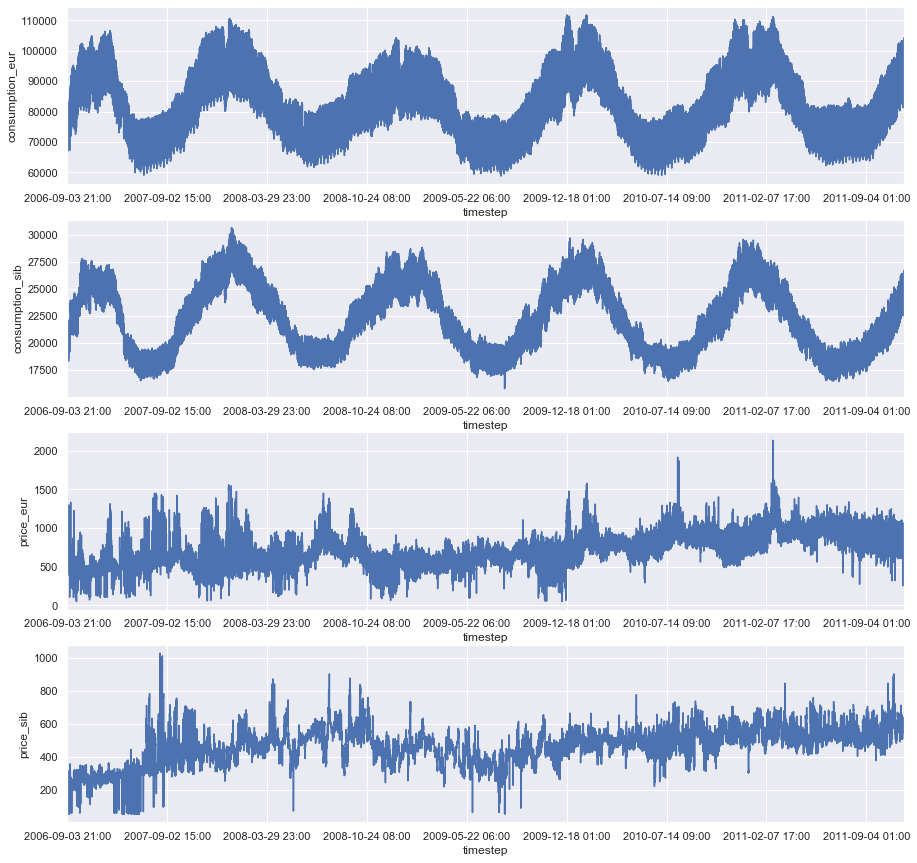

In [75]:
plt.figure(figsize = (15,15))

ax1 = plt.subplot(4, 1, 1)
dayahead_price['consumption_eur'].plot()
ax1.set_ylabel("consumption_eur")

ax2 = plt.subplot(4, 1, 2)
dayahead_price['consumption_sib'].plot()
ax2.set_ylabel("consumption_sib")

ax3 = plt.subplot(4, 1, 3)
dayahead_price['price_eur'].plot()
ax3.set_ylabel("price_eur")

ax4 = plt.subplot(4, 1, 4)
dayahead_price['price_sib'].plot()
ax4.set_ylabel("price_sib")

In [76]:
UES_dayahead_price.head()

,UES_Northwest,UES_Siberia,UES_Middle_Volga,UES_Urals,UES_Center,UES_South
timestep,,,,,,
2017-01-01 00:00,964.67,1006.27,1032.80,953.23,1050.17,1706.30
2017-01-01 01:00,984.79,1003.79,1033.34,946.79,1051.15,1592.17
2017-01-01 02:00,962.54,1005.09,1029.51,944.35,1039.84,1561.85
2017-01-01 03:00,888.44,1002.38,976.34,906.15,977.04,1534.37
2017-01-01 04:00,847.10,1002.58,945.28,894.08,938.27,1517.58


In [18]:
"""UES_dayahead_price["datetime"] = pd.to_datetime(UES_dayahead_price["timestep"])
UES_dayahead_price.drop("timestep", axis = 1, inplace = True)
UES_dayahead_price.set_index(["datetime"], drop = True, inplace = True)
UES_dayahead_price.head()

,UES_Northwest,UES_Siberia,UES_Middle_Volga,UES_Urals,UES_Center,UES_South
datetime,,,,,,
2017-01-01 00:00:00,964.67,1006.27,1032.80,953.23,1050.17,1706.30
2017-01-01 01:00:00,984.79,1003.79,1033.34,946.79,1051.15,1592.17
2017-01-01 02:00:00,962.54,1005.09,1029.51,944.35,1039.84,1561.85
2017-01-01 03:00:00,888.44,1002.38,976.34,906.15,977.04,1534.37
2017-01-01 04:00:00,847.10,1002.58,945.28,894.08,938.27,1517.58


Text(0, 0.5, 'UES_South')

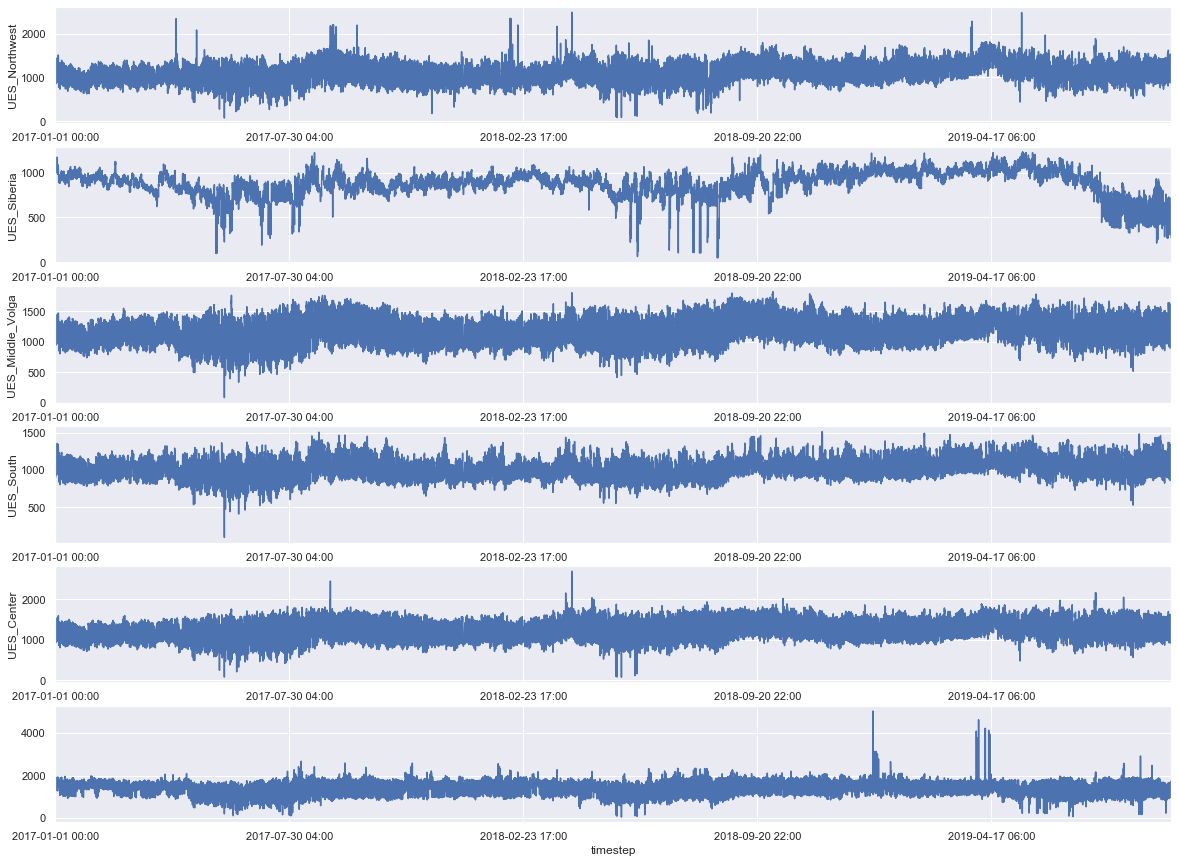

In [77]:
#time series plot
plt.figure(figsize = (20,15))

ax1 = plt.subplot(6, 1, 1)
UES_dayahead_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(6, 1, 2)
UES_dayahead_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(6, 1, 3)
UES_dayahead_price['UES_Middle_Volga'].plot()
ax3.set_ylabel("UES_Middle_Volga")

ax4 = plt.subplot(6, 1, 4)
UES_dayahead_price['UES_Urals'].plot()
ax4.set_ylabel("UES_Urals")

ax5 = plt.subplot(6, 1, 5)
UES_dayahead_price['UES_Center'].plot()
ax5.set_ylabel("UES_Center")

ax6 = plt.subplot(6, 1, 6)
UES_dayahead_price['UES_South'].plot()
ax4.set_ylabel("UES_South")

In [78]:
intraday_price = UES_intraday_price
intraday_price.head()

,UES_Northwest,UES_Siberia,UES_Center
timestep,,,
2017-01-01 00:00,767.0,918.0,982.0
2017-01-01 01:00,675.0,889.0,848.0
2017-01-01 02:00,717.0,933.0,920.0
2017-01-01 03:00,683.0,947.0,885.0
2017-01-01 04:00,633.0,934.0,829.0


In [21]:
"""intraday_price["datetime"] = pd.to_datetime(intraday_price["timestep"])
intraday_price.drop("timestep", axis = 1, inplace = True)
intraday_price.set_index(["datetime"], drop = True, inplace = True)
intraday_price.head()

,UES_Northwest,UES_Siberia,UES_Center
datetime,,,
2017-01-01 00:00:00,767,918,982
2017-01-01 01:00:00,675,889,848
2017-01-01 02:00:00,717,933,920
2017-01-01 03:00:00,683,947,885
2017-01-01 04:00:00,633,934,829


Text(0, 0.5, 'UES_Center')

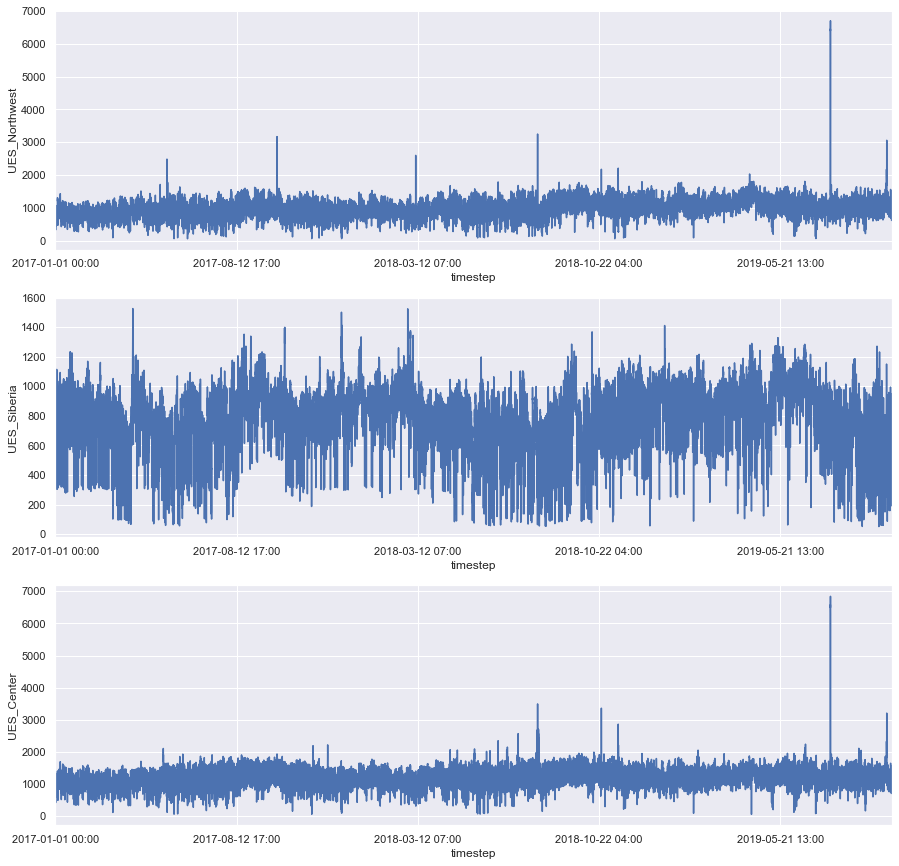

In [79]:
#time series plot
plt.figure(figsize = (15,15))

ax1 = plt.subplot(3, 1, 1)
intraday_price['UES_Northwest'].plot()
ax1.set_ylabel("UES_Northwest")

ax2 = plt.subplot(3, 1, 2)
intraday_price['UES_Siberia'].plot()
ax2.set_ylabel("UES_Siberia")

ax3 = plt.subplot(3, 1, 3)
intraday_price['UES_Center'].plot()
ax3.set_ylabel("UES_Center")


# AUTOREGRESSION MODEL

Since this is a Time series problem, we use an autoregression model.

### Check for Autocorrelation using `lag_plot()`

In [80]:
from pandas.plotting import lag_plot

In [81]:
# lets do `consumption_eur` first from the dayahead_price_volume data

# first create a dataset with the datetime and consumption_eur
consumption_eur = pd.DataFrame(dayahead_price["consumption_eur"], index = dayahead_price.index)
consumption_eur.head()



,consumption_eur
timestep,
2006-09-03 21:00,70250.0
2006-09-03 22:00,66733.0
2006-09-05 16:00,72688.0
2006-09-05 17:00,71822.0
2006-09-05 18:00,71933.0


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


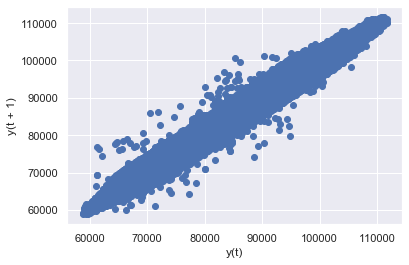

In [82]:
lag_plot(consumption_eur)
plt.show()

### Observation

A cluster of the data on the diagonal shows a high correlation in the dataset.

Let's do a Further correlation check using Pearson Correlation coeficient .corr())

In [83]:
values = pd.DataFrame(consumption_eur.values)
data = pd.concat([values.shift(1), values], axis = 1) #creates a dataset of a value -1 and value + 1
data.columns = ["t-1", "t+1"]
result = data.corr()
print(result)

          t-1       t+1
t-1  1.000000  0.982374
t+1  0.982374  1.000000


We can see a high and beautiful correlation

### Autocorrelation Plot using `autocorrelation_plot`
This plots the correlation coefficient for each lag variable. This is a good check to determine which lag variable will be a good fit for a predictive model

In [84]:
from pandas.plotting import autocorrelation_plot

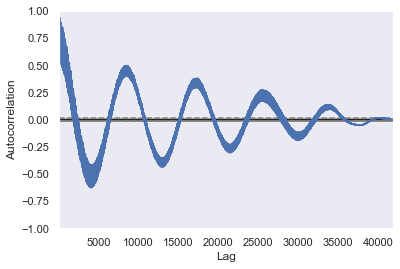

In [85]:
autocorrelation_plot(consumption_eur)
#autocorrelation_plot(, linewidth = 1)
plt.show()

Further check using the statsmodel `plot_acf`

In [86]:
from statsmodels.graphics.tsaplots import plot_acf

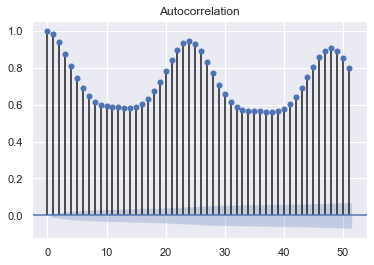

In [87]:
plot_acf(consumption_eur, lags = 51)
plt.show()

As expected, the power consumptions seem to have a nice symmetrical cyclic pattern.
The prices though seem to be quite volatile, but not unexpeted certainly.
The prices also seem to have a lot of values that are zero before the year 2010.

Since we are going to use a form of auto-regression, we are only going to use historical data of any particular attribute to make predictions for that attribute.

Let's do some autocorrelation analysis for each of the four attributes.

## Autoregression Model using Statsmodels `AR()`

In [88]:
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt

In [89]:
#dataset 
dataset = consumption_eur.values

#split data with train_test_split
from sklearn.model_selection import train_test_split

#train, test = train_test_split(dataset, shuffle = True, random_state = 42, test_size = 0.2)
train, test = dataset[1: len(dataset) - 30], dataset[len(dataset) - 30:]

In [90]:
train.shape

(41888, 1)

In [91]:
test.shape

(30, 1)

In [92]:
# Train Autoregression for consumption_eur

#model = AutoReg(train, lags = lag_cons)
model = AR(train)
model_fit = model.fit()
print('Coefficients: %s' % model_fit.params)
print('The lag value chose is: %s' % model_fit.k_ar)

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 2.26438369e+02  1.43842098e+00 -4.54686466e-01 -1.38582855e-01
  7.63008922e-02  1.98025452e-02 -1.02250993e-03 -9.54276413e-03
  3.18572234e-02 -3.53522936e-02  1.74728466e-02 -7.50258794e-04
  1.58060634e-03  8.85451120e-03 -7.33624932e-02  2.45539103e-02
  5.70362704e-02  2.61745058e-03 -1.14782908e-02  1.19173268e-02
  1.14247666e-02 -4.09615004e-02  5.86649219e-02  1.13359271e-01
  1.39222154e-01 -3.18953323e-01  8.33491970e-03  1.14747131e-01
 -7.36132383e-02  1.75505909e-02 -1.00766152e-02 -2.32042420e-02
  2.67734369e-02 -5.79659822e-03  8.32614137e-03  1.56283399e-02
 -3.15712266e-03 -2.38288914e-02  6.20220714e-02 -5.64068169e-02
 -3.15276079e-03 -1.09765008e-02 -1.52911505e-02  3.54664892e-02
 -2.05698546e-02 -3.03408976e-03 -2.89357410e-02  1.05215620e-01
  8.83472462e-02 -2.05890596e-01  6.12368317e-02 -7.81969002e-03
  5.75069745e-02 -2.49020133e-02 -1.56245860e-02]
The lag value chose is: 54


In [93]:
out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
print(out.format(model_fit.aic, model_fit.hqic, model_fit.bic))


AIC: 13.595, HQIC: 13.598, BIC: 13.606


In [94]:
# Make Prediction

prediction = model_fit.predict(start=len(train), end = len(train)+len(test)-1, dynamic = False)
prediction


array([104052.5463453 , 103111.51971919, 100913.81573916,  97535.30952236,
        93454.89146319,  89862.15753879,  87689.56103943,  86100.10295744,
        85461.44643518,  85785.20126847,  86930.470325  ,  88892.48852602,
        92325.12499404,  96231.08864803,  99103.89777106, 100422.9637014 ,
       100537.70182878, 100057.96735496,  99690.95786143,  99564.55214625,
        99499.60729116,  99499.13423087, 100238.98233288, 101420.18019818,
       102130.11801252, 101566.45727495,  99758.95704827,  96865.8940567 ,
        93217.5475409 ,  89887.89157524])

In [95]:
# Root Mean Squared Error 
rmse = sqrt(mean_squared_error(prediction, test))
print('Test RMSE: %.3f' % rmse)


Test RMSE: 1351.544


In [96]:
#create a comparison dataframe
for i in range(len(prediction)):
    print('predicted=%f, expected=%f' % (prediction[i], test[i]))

predicted=104052.546345, expected=104170.000000
predicted=103111.519719, expected=102786.000000
predicted=100913.815739, expected=100317.000000
predicted=97535.309522, expected=97671.000000
predicted=93454.891463, expected=93488.000000
predicted=89862.157539, expected=89154.000000
predicted=87689.561039, expected=86639.000000
predicted=86100.102957, expected=85042.000000
predicted=85461.446435, expected=84251.000000
predicted=85785.201268, expected=84334.000000
predicted=86930.470325, expected=85948.000000
predicted=88892.488526, expected=87348.000000
predicted=92325.124994, expected=91732.000000
predicted=96231.088648, expected=97646.000000
predicted=99103.897771, expected=101237.000000
predicted=100422.963701, expected=102659.000000
predicted=100537.701829, expected=102410.000000
predicted=100057.967355, expected=101584.000000
predicted=99690.957861, expected=101366.000000
predicted=99564.552146, expected=101484.000000
predicted=99499.607291, expected=101365.000000
predicted=99499.13

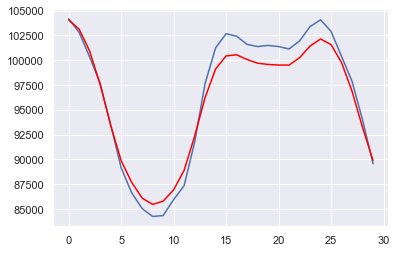

In [97]:
#plot results
plt.plot(test)
plt.plot(prediction, color = "red")

In [98]:
#calculate r2 score to check goodness of fit
from sklearn.metrics import r2_score

r2 = r2_score(test, prediction)
r2

0.960400661741684

   ## 98.8% BEAUTIFUL!!

In [99]:
prediction

array([104052.5463453 , 103111.51971919, 100913.81573916,  97535.30952236,
        93454.89146319,  89862.15753879,  87689.56103943,  86100.10295744,
        85461.44643518,  85785.20126847,  86930.470325  ,  88892.48852602,
        92325.12499404,  96231.08864803,  99103.89777106, 100422.9637014 ,
       100537.70182878, 100057.96735496,  99690.95786143,  99564.55214625,
        99499.60729116,  99499.13423087, 100238.98233288, 101420.18019818,
       102130.11801252, 101566.45727495,  99758.95704827,  96865.8940567 ,
        93217.5475409 ,  89887.89157524])

In [100]:
data_test = dayahead_price["consumption_eur"].tail(30)
data_test = pd.DataFrame(data_test)

In [101]:
data_test["predicted"] = prediction
data_test

,consumption_eur,predicted
timestep,,
2011-11-21 18:00,104170.0,104052.546345
2011-11-21 19:00,102786.0,103111.519719
2011-11-21 20:00,100317.0,100913.815739
2011-11-21 21:00,97671.0,97535.309522
2011-11-21 22:00,93488.0,93454.891463
2011-11-21 23:00,89154.0,89862.157539
2011-11-22 00:00,86639.0,87689.561039
2011-11-22 01:00,85042.0,86100.102957
2011-11-22 02:00,84251.0,85461.446435


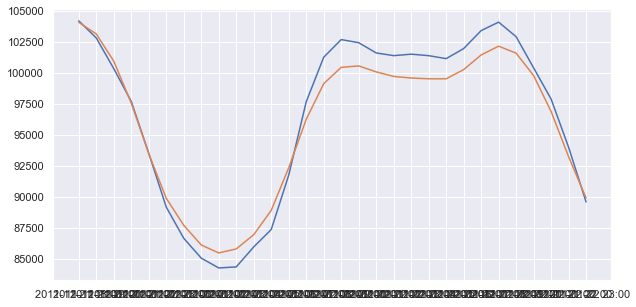

In [102]:
plt.figure(figsize = (10,5))
plt.plot(data_test["consumption_eur"])
plt.plot(data_test["predicted"])


Text(0.5, 1.0, 'Consumption Vs Predicted')

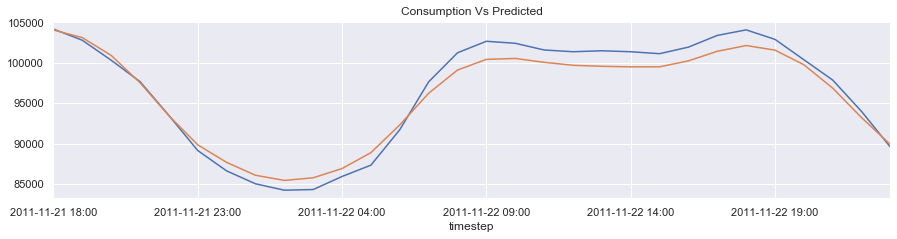

In [103]:
plt.figure(figsize = (15,15))

ax1 = plt.subplot(4, 1, 1)
data_test['consumption_eur'].plot()
data_test['predicted'].plot()
ax1.set_title("Consumption Vs Predicted")



## I'll create a function to make it easy for other variables
Let's Go!!!

In [104]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import autocorrelation_plot
from sklearn.model_selection import train_test_split
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.ar_model import AR
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.graphics.tsaplots import plot_acf
from sklearn.metrics import r2_score


# first create a dataset with the datetime and consumption_eur

#1. Create datetime dataset
def create_data(dataset, column_name: str):
    global new_data
    new_data = pd.DataFrame(dataset[column_name], index = dataset.index)
    return new_data

#2. plor lag_plot to show correlation

def plot_lag(var):  #takes pandas dataset created above
    lag_plot(var)
    plt.show()
    
#3. confirm correlation with Pearson Correlation Coefficient 

def corr_coef(data): #takes pandas dataset created above
    data = data.copy()
    values = pd.DataFrame(data.values)
    values_data = pd.concat([values.shift(1), values], axis = 1) #creates a dataset of a value -1 and value + 1 
    values_data.columns = ["t-1", "t+1"]
    result = values_data.corr()
    return result

#4. This plots the correlation coefficient for each lag variable. 
#This is a good check to determine which lag variable will be a good fit for a predictive model

def autocorrelation(data_):
    autocorrelation_plot(data_)
    plt.show()
    
#5. Further check using states model
def acf(data_):
    plot_acf(data_, lags = 51)
    plt.show()
    
#6. Autoregression model
def AutoRegres(_data):  #takes new_data
    dataset = _data.values
    #split data with train_test_split
    train, test = dataset[1: len(dataset) - 30], dataset[len(dataset) - 30:]
    
    # Train Autoregression for data and print stats
    model = AR(train)
    model_fit = model.fit()
    print('Coefficients: %s' % model_fit.params)
    print('The lag value chose is: %s' % model_fit.k_ar)
    out = 'AIC: {0:0.3f}, HQIC: {1:0.3f}, BIC: {2:0.3f}'
    print(out.format(model_fit.aic, model_fit.hqic, model_fit.bic))

    # Make Prediction

    prediction = model_fit.predict(start=len(train), end = len(train)+len(test)-1, dynamic = False)
    
    # Root Mean Squared Error 
    rmse = sqrt(mean_squared_error(prediction, test))
    print('Test RMSE: %.3f' % rmse)

    #create a comparison dataframe
    for i in range(len(prediction)):
        print('predicted=%f, expected=%f' % (prediction[i], test[i]))

    #plot results
    plt.plot(test)
    plt.plot(prediction, color = "red")
    
    #calculate r2 score to check goodness of fit
    r2 = r2_score(test, prediction)
    return r2

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


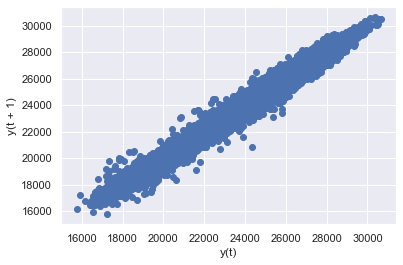

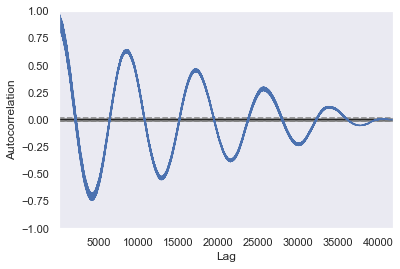

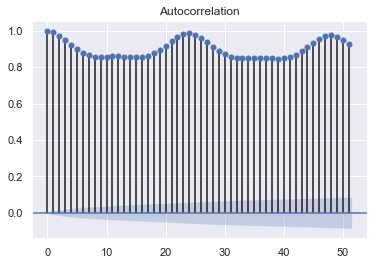

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 1.88213636e+01  1.22505529e+00 -2.73012479e-01 -1.16834141e-01
  1.46602083e-02  7.67654488e-03  1.43391578e-02  1.73530546e-02
  2.27616403e-02  2.23732769e-03 -1.10670772e-02  2.68839171e-02
 -2.81422851e-02  2.01189171e-02 -5.57936530e-02  3.93658418e-02
 -5.28286656e-04  4.55399886e-02 -1.94852436e-02  1.74992549e-02
 -9.05259340e-03 -7.25430041e-03  5.40656289e-02  9.81020424e-02
  1.90499432e-01 -2.95263717e-01  4.10106009e-03  6.15027685e-02
 -2.53863414e-02  7.20870534e-03 -1.96485272e-02 -9.79880060e-03
 -1.08224600e-02  6.79764543e-03 -7.29234176e-03  1.44638407e-02
  1.26861139e-02 -1.53467448e-02  5.07329415e-03  1.90264330e-03
 -2.79366419e-02 -4.72079809e-03 -1.90047634e-02  2.87000526e-02
 -1.04753891e-02 -1.98277416e-02 -1.07456539e-02  7.43383185e-02
  1.36369507e-01 -1.73839667e-01 -7.90811168e-03  1.44064013e-02
  5.01914694e-02  1.25843403e-02 -4.81244559e-02]
The lag value chose is: 54
AIC: 10.386, HQIC: 10.390, BIC: 10.398
Test RMSE: 290.077
predic

0.9510750345866267

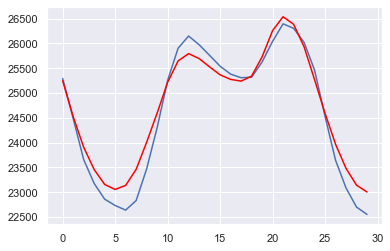

In [105]:
#Consumption_sib 

create_data(dayahead_price, "consumption_sib")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


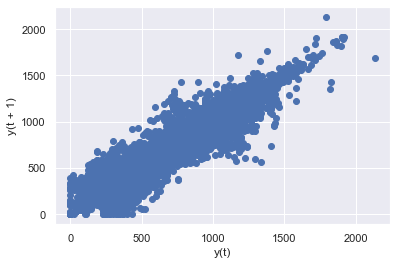

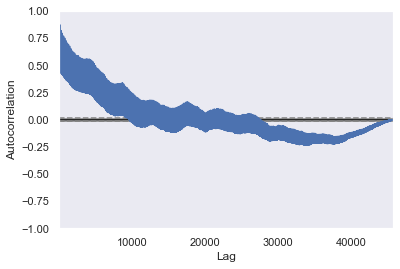

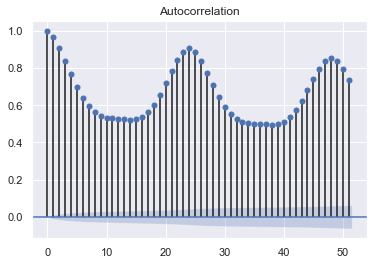

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 5.40093418e+00  8.83166766e-01 -1.00572825e-03  1.18493350e-02
 -4.04160049e-04 -7.43216020e-03  5.31869138e-03 -3.25222992e-04
  7.03118479e-03 -2.28550291e-02  2.47897791e-03  1.15365695e-02
  9.28264580e-03 -2.66033456e-02 -5.44765815e-03 -6.26858331e-03
 -5.81955838e-03  1.29897477e-02 -1.37846073e-03  1.28686919e-02
  1.20194568e-02  2.22131497e-02  3.16693933e-02  8.52286194e-02
  2.67611219e-01 -2.20849724e-01 -7.43163407e-02 -4.32028025e-02
  2.36915862e-03 -1.88143753e-02  3.72250945e-03 -1.74548569e-02
  1.79156991e-02  7.67770329e-03 -4.02170314e-03  1.00652081e-03
  2.52858582e-02 -1.09674818e-02  7.44907218e-03  8.25326436e-04
 -1.08459952e-02  6.91579701e-03 -2.91701537e-03 -1.25783085e-02
 -1.11492629e-02 -1.29232554e-02  1.47839697e-02  3.31169823e-02
  1.00087190e-01 -7.58514661e-02 -1.93709673e-02  6.51466911e-03
 -1.38066896e-02  2.16206985e-02 -6.97184128e-03 -1.59148865e-03
  3.29699397e-03]
The lag value chose is: 56
AIC: 7.620, HQIC: 7.623, BIC: 7

0.884582614169589

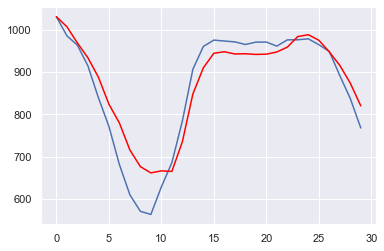

In [299]:
#price_eur

create_data(dayahead_price, "price_eur")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


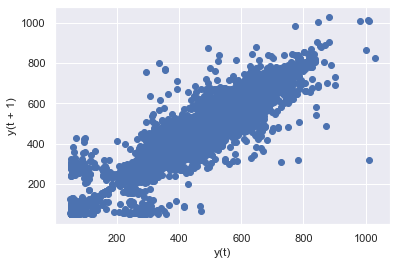

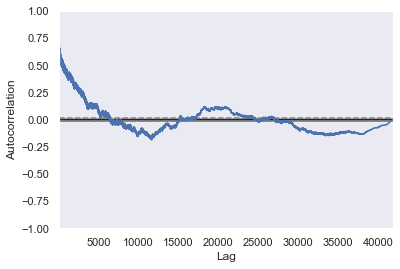

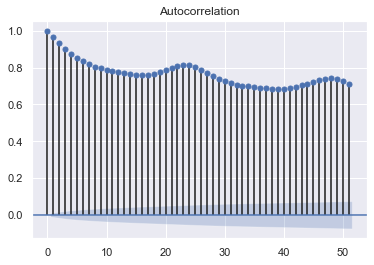

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 5.83442389e+00  8.45661186e-01  2.74560413e-02  4.84596729e-03
 -2.55654347e-02  2.38792427e-02  1.77978985e-02  1.83806706e-02
 -1.40309188e-02  1.98275089e-02 -3.59104614e-03  1.43575586e-02
 -5.85483993e-03  3.52465085e-03 -2.48337710e-02  1.81834327e-02
 -3.88845118e-02  6.45243691e-03  2.31539815e-02  1.35475395e-02
  2.30961828e-02  1.41829428e-02  1.92056528e-02  3.65474733e-02
  9.76432369e-02 -7.36432169e-02 -4.87135194e-02 -2.32356532e-02
  1.92502197e-02 -2.97841920e-02 -4.70470248e-03  1.40867270e-02
 -1.91870113e-02 -1.65098890e-02  2.61829086e-02  5.72351227e-03
 -5.67272920e-03  3.60906565e-03  5.84146285e-03 -5.26773461e-03
 -6.56826389e-03 -1.09352901e-03 -1.36914989e-03  2.62938743e-03
 -5.00503452e-03  4.61815379e-03  2.23844879e-02  3.27060720e-02
  2.20416524e-02 -8.03455799e-03 -2.22575113e-04 -4.61422524e-03
 -8.61857150e-03 -1.04396436e-02 -1.37520276e-02]
The lag value chose is: 54
AIC: 6.647, HQIC: 6.651, BIC: 6.658
Test RMSE: 29.166
predicted=

-0.0455908652633763

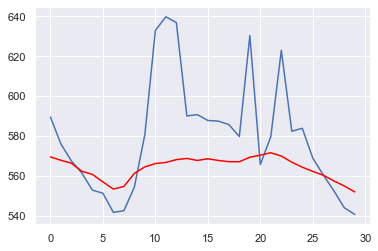

In [106]:
#price_sib

create_data(dayahead_price, "price_sib")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

In [310]:
UES_dayahead_price.head()

,UES_Northwest,UES_Siberia,UES_Middle_Volga,UES_Urals,UES_Center,UES_South
datetime,,,,,,
2017-01-01 00:00:00,964.67,1006.27,1032.80,953.23,1050.17,1706.30
2017-01-01 01:00:00,984.79,1003.79,1033.34,946.79,1051.15,1592.17
2017-01-01 02:00:00,962.54,1005.09,1029.51,944.35,1039.84,1561.85
2017-01-01 03:00:00,888.44,1002.38,976.34,906.15,977.04,1534.37
2017-01-01 04:00:00,847.10,1002.58,945.28,894.08,938.27,1517.58


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


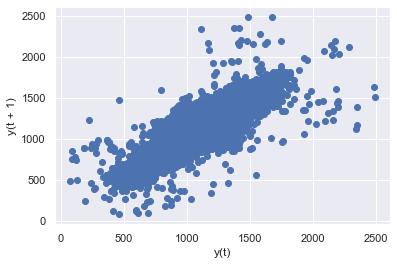

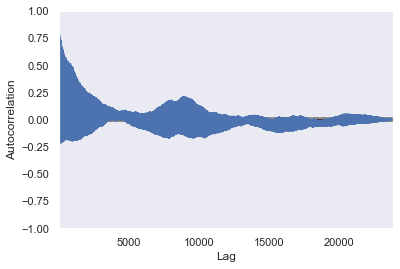

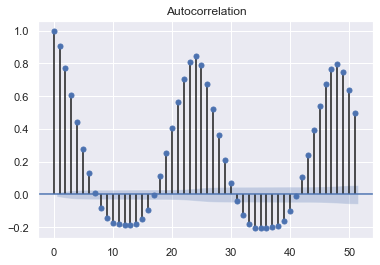

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 3.60282133e+01  7.63176311e-01 -1.59672207e-03 -7.34789540e-03
  1.04428997e-02  1.79447976e-02 -2.33419760e-02  2.80585421e-02
  1.32747336e-02 -4.58144233e-02  2.00660799e-02  3.02389184e-02
  2.04666784e-03 -3.54838528e-02  1.45855934e-02 -3.32242280e-02
  6.70840287e-03  4.63252822e-03  6.64146972e-03  7.77856418e-03
  1.73886181e-02  2.37327252e-02  3.57071274e-02  8.70778781e-02
  2.25730212e-01 -1.23380424e-01 -7.62499735e-02 -4.10598739e-02
  1.90274889e-03 -1.96108986e-02 -2.26598193e-03 -1.72236611e-02
 -4.58704755e-03 -1.68112645e-02  1.44866518e-02 -8.48673019e-03
  3.75236602e-02 -8.60115197e-04 -1.69202563e-02 -8.58626593e-03
  1.43207677e-02 -1.05728538e-02 -8.04019637e-03  1.18866762e-02
 -1.33429956e-02 -2.20585627e-02  2.13590068e-02  8.90491256e-02]
The lag value chose is: 47
AIC: 8.804, HQIC: 8.810, BIC: 8.821
Test RMSE: 72.115
predicted=1368.695330, expected=1427.040000
predicted=1395.174138, expected=1491.760000
predicted=1401.771086, expected=1454

0.8831704644103935

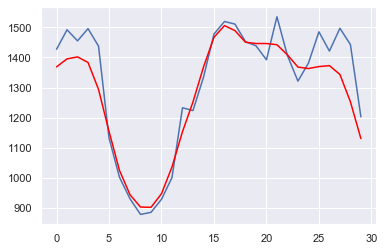

In [107]:
#UES_dayahead_price UES_Northwest 

create_data(UES_dayahead_price, "UES_Northwest")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


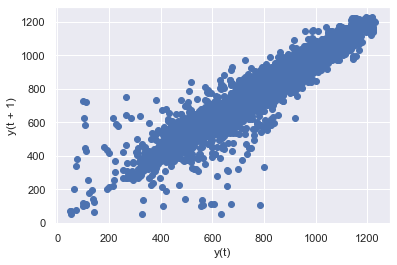

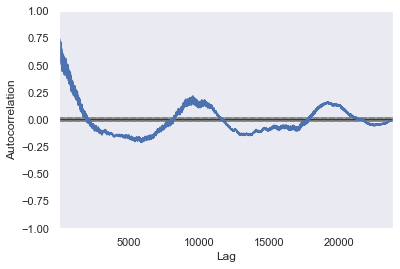

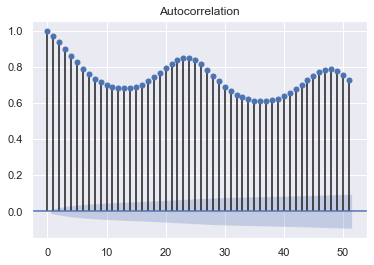

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 6.62620286e+00  8.98450889e-01  2.79749238e-02 -6.16589473e-02
  3.07307920e-02 -8.33989426e-03 -2.94174835e-03  4.95289959e-03
  2.66775409e-02 -1.75911580e-02 -3.09881465e-03  2.05899131e-02
 -1.14992970e-02  7.77746473e-03 -1.05564080e-02 -1.77504113e-02
  1.70231019e-02  1.61340791e-03  1.34070189e-02  2.97707219e-02
  1.60148558e-02  1.74501750e-02  1.01009437e-02  7.70128223e-02
  5.27716574e-02 -6.41822720e-02 -2.52677382e-02 -4.01955594e-02
 -3.03713427e-02  5.95402518e-03 -2.91711852e-02 -2.24505083e-03
  5.29229872e-03  7.04178730e-03 -2.37265195e-03  2.54513527e-03
 -4.27906297e-03  2.92203704e-03 -1.61033964e-03 -2.72355189e-03
 -2.10459024e-03 -1.08138008e-02 -1.42036321e-02 -4.37025849e-03
  3.58282505e-04  1.30713983e-02  5.49441892e-02  1.53212774e-02]
The lag value chose is: 47
AIC: 6.860, HQIC: 6.865, BIC: 6.877
Test RMSE: 56.551
predicted=555.928452, expected=569.760000
predicted=493.151914, expected=526.540000
predicted=445.266429, expected=476.07000

0.6608589247741647

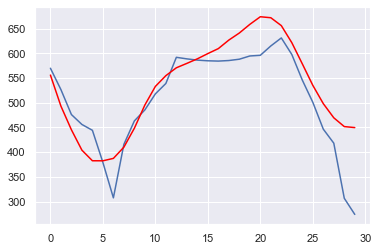

In [108]:
#UES_dayahead_price UES_Siberia

create_data(UES_dayahead_price, "UES_Siberia")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


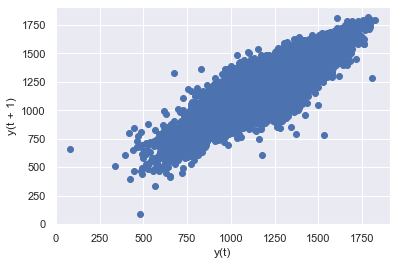

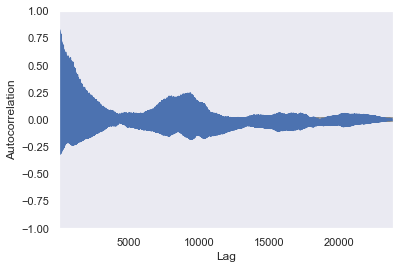

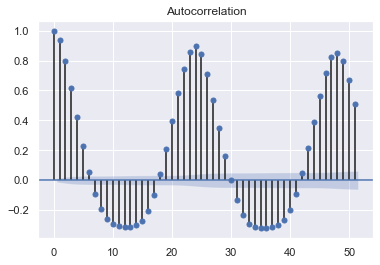

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 2.99147492e+01  9.80272651e-01 -1.12001720e-01 -2.48417804e-02
 -1.03265283e-02  1.54840815e-03  1.43307414e-02 -1.08197559e-02
  4.02070863e-02 -3.33988619e-02 -1.04224164e-02  2.20172044e-02
 -3.01174339e-03 -2.67794290e-03 -1.95983779e-02 -3.96698245e-02
  5.13149571e-03 -1.23571180e-02  1.67548147e-02  4.43959271e-02
  2.33592375e-02 -1.15525542e-02  3.97774655e-02  8.04053483e-02
  3.05842013e-01 -2.90003122e-01 -6.33348790e-02 -1.08995433e-02
  1.68421582e-02 -2.26942189e-03 -1.16291068e-02 -1.59572780e-02
 -1.79835866e-02 -8.75050331e-03  4.09758041e-02  8.03487851e-03
 -3.30071247e-03  1.32166207e-02 -1.39811628e-02  4.40919815e-03
  2.21421183e-02  1.13398058e-02 -1.49754021e-02 -1.50007260e-02
 -4.07261386e-02  3.49184786e-03  1.04326436e-02  7.06803492e-02]
The lag value chose is: 47
AIC: 7.860, HQIC: 7.865, BIC: 7.876
Test RMSE: 69.423
predicted=1501.426413, expected=1542.880000
predicted=1500.954576, expected=1614.280000
predicted=1443.487990, expected=1586

0.9073699923750727

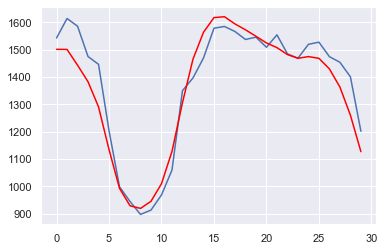

In [109]:
#UES_dayahead_price UES_Middle_Volga

create_data(UES_dayahead_price, "UES_Middle_Volga")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


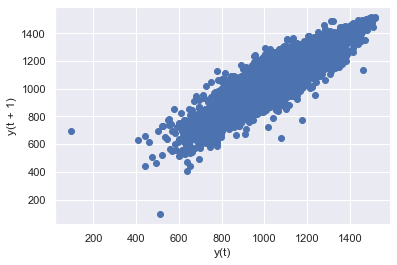

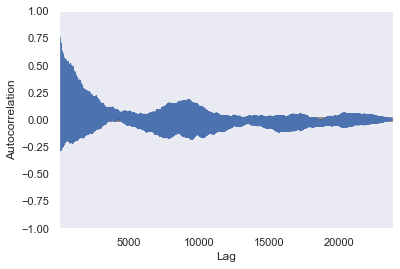

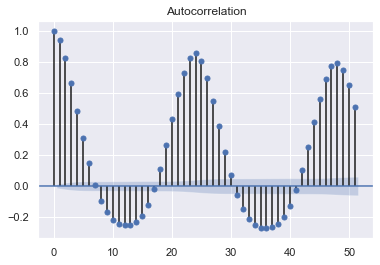

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 2.59514689e+01  1.02407674e+00 -1.09010650e-01 -4.65286252e-02
 -4.02300537e-03 -2.17596743e-03  4.30734454e-03 -2.98063442e-04
  3.87008429e-02 -3.84994952e-02  4.70718652e-03  2.17319258e-02
 -1.48337750e-02 -1.66643470e-02 -3.23969968e-02  7.04120934e-03
 -1.90611287e-02  2.02425341e-02 -4.18482718e-03  3.97039668e-02
  1.18664640e-02  4.99208917e-03  4.25315460e-02  5.19655203e-02
  2.39234367e-01 -2.18133661e-01 -4.60142642e-02 -3.08500060e-02
 -6.29195789e-03 -4.14861986e-04  3.57278063e-03 -1.06168834e-02
 -1.75234723e-02  2.64907325e-03  1.60657594e-03  3.38179919e-02
 -1.14211794e-03  1.67403005e-02 -1.73390720e-02  3.72703130e-03
  1.33125087e-02 -4.53935748e-03  4.44369085e-03 -3.23638929e-02
 -1.35510848e-02  4.64210666e-03  3.18905962e-02  3.46155593e-02]
The lag value chose is: 47
AIC: 7.078, HQIC: 7.084, BIC: 7.095
Test RMSE: 57.838
predicted=1278.534450, expected=1340.790000
predicted=1244.209042, expected=1293.330000
predicted=1179.330076, expected=1244

0.8287658737384527

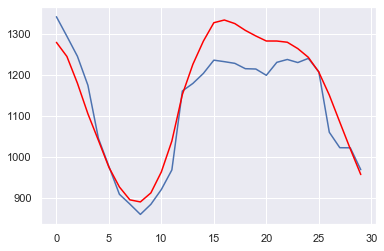

In [110]:
#UES_dayahead_price UES_Urals

create_data(UES_dayahead_price, "UES_Urals")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


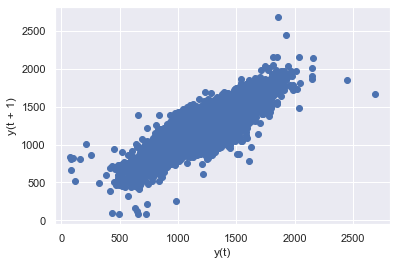

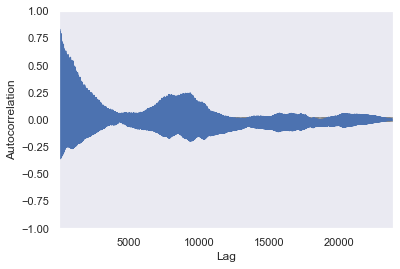

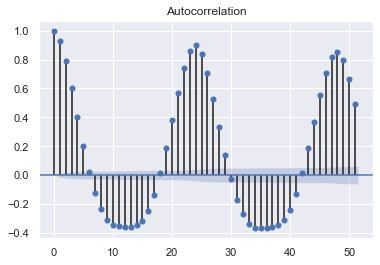

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 3.88829432e+01  9.42624579e-01 -8.47058429e-02 -1.99860420e-02
 -7.30702568e-03 -7.60768723e-03  1.14161867e-02 -1.04187061e-03
  5.20357546e-02 -6.17248129e-02 -2.20602734e-03  2.91298157e-02
  1.69517840e-03 -1.57900240e-02 -9.22079061e-03 -4.09306467e-02
 -6.47080223e-03 -1.48213920e-02  2.74095879e-02  4.72226993e-02
  2.24480643e-02 -7.01266390e-03  3.29911950e-02  7.89325356e-02
  3.27403783e-01 -2.82800997e-01 -9.03811104e-02 -2.74242450e-03
  4.73650457e-03  1.22630878e-02 -1.10598144e-02 -2.56491973e-02
 -1.70094414e-02 -4.06655827e-03  4.01667235e-02  1.11122201e-03
  8.10654470e-03  1.56921517e-03 -1.38125252e-02  5.39509120e-03
  4.15967450e-02 -3.31062342e-03 -9.87770358e-03 -3.03755474e-02
 -3.43439673e-02 -1.20561514e-03  9.16799854e-03  7.86346154e-02]
The lag value chose is: 47
AIC: 8.193, HQIC: 8.199, BIC: 8.210
Test RMSE: 64.099
predicted=1489.034277, expected=1568.260000
predicted=1518.738558, expected=1623.150000
predicted=1502.756037, expected=1587

0.9233622577383463

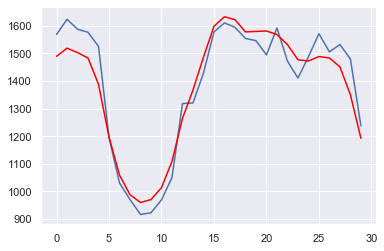

In [111]:
#UES_dayahead_price UES_Center

create_data(UES_dayahead_price, "UES_Center")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


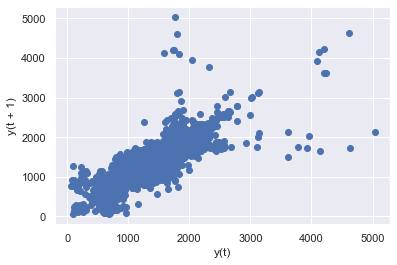

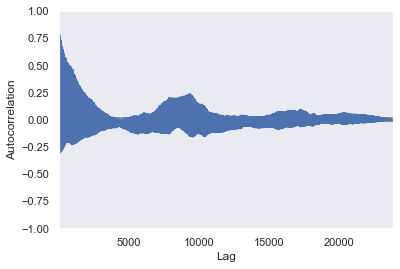

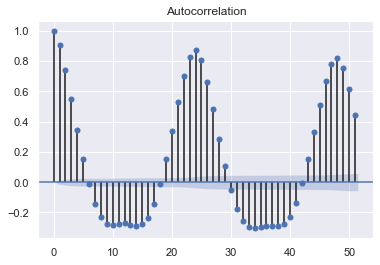

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 6.74577025e+01  8.14797128e-01 -1.00156274e-01  3.69013685e-02
 -1.24914966e-02  2.69382972e-03  1.36972451e-02 -7.55611725e-03
 -4.60102599e-03 -1.57472443e-02  2.99858431e-02  6.60690198e-02
 -3.01644488e-02 -2.24211240e-02 -3.48163182e-02  6.73508849e-03
 -2.38991618e-02 -5.88035228e-03  1.63141921e-02  3.05992517e-02
  1.98913551e-02  7.31348242e-03  7.65982744e-02  3.80303928e-02
  2.53537935e-01 -1.29921024e-01 -5.67332395e-02 -2.76818141e-02
  1.97373354e-03 -1.14008906e-02 -9.28389027e-03 -1.97824354e-02
 -1.45853021e-02  1.29030457e-03 -8.83995705e-03 -1.32847706e-02
  1.80565581e-02  3.79731117e-02 -1.23125105e-02 -2.20388977e-02
  9.98822709e-03 -8.18441693e-04  2.21887804e-02 -1.56998900e-02
 -3.31296071e-02 -2.97693031e-03 -7.35935329e-03  9.39328135e-02]
The lag value chose is: 47
AIC: 9.328, HQIC: 9.334, BIC: 9.345
Test RMSE: 68.820
predicted=1610.206775, expected=1657.110000
predicted=1641.933222, expected=1674.960000
predicted=1629.740099, expected=1658

0.9326558744514155

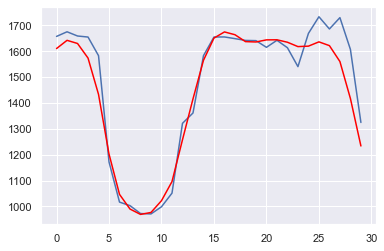

In [112]:
#UES_dayahead_price UES_South

create_data(UES_dayahead_price, "UES_South")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

In [309]:
intraday_price.head()

,UES_Northwest,UES_Siberia,UES_Center
datetime,,,
2017-01-01 00:00:00,767,918,982
2017-01-01 01:00:00,675,889,848
2017-01-01 02:00:00,717,933,920
2017-01-01 03:00:00,683,947,885
2017-01-01 04:00:00,633,934,829


'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


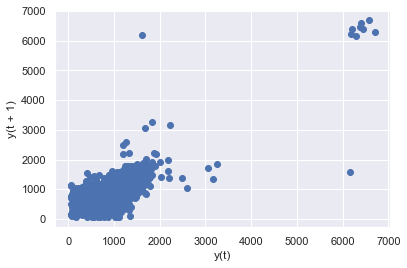

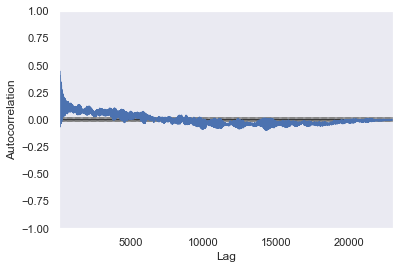

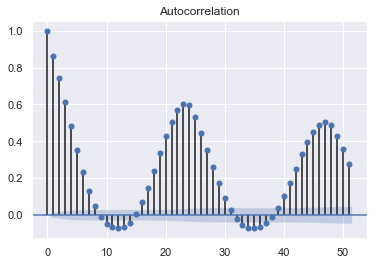

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 5.72684376e+01  7.46514082e-01  6.28765343e-02  2.44510595e-02
 -1.69390340e-02 -8.82661220e-03 -3.17659053e-02 -1.37710781e-02
  7.54399148e-03 -2.60716958e-02  1.98925071e-02  1.49419900e-02
  1.29043630e-02 -3.01287963e-02 -2.64109110e-02  1.13819908e-02
  7.48409339e-03 -6.60846094e-03  2.99760728e-02  2.06087125e-02
  2.36218358e-02  5.47696664e-03  4.40981380e-02  7.45267739e-02
  8.51806220e-02 -1.06156410e-01 -4.73264171e-02 -1.08130245e-02
 -4.39573565e-04 -7.32132054e-04 -7.56048391e-04  5.70694743e-03
 -1.63626113e-05  1.59994412e-02 -1.20293365e-02  2.65300126e-03
 -4.93504564e-04  1.17081328e-02 -9.31388782e-03 -5.45851324e-03
 -3.31685360e-05  6.14698949e-03 -1.13242627e-02  1.34324600e-02
 -1.08670887e-02  2.04784715e-02  3.29126599e-04  5.15333306e-02]
The lag value chose is: 47
AIC: 9.863, HQIC: 9.868, BIC: 9.880
Test RMSE: 182.210
predicted=1158.076780, expected=1014.000000
predicted=1158.528876, expected=1052.000000
predicted=1145.240982, expected=118

0.019652796370281278

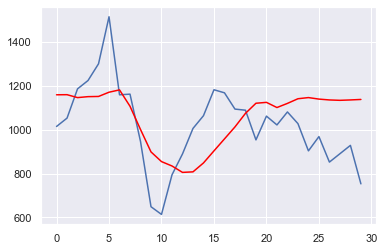

In [113]:
#UES_intraday_price UES_Northwest

create_data(intraday_price, "UES_Northwest")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


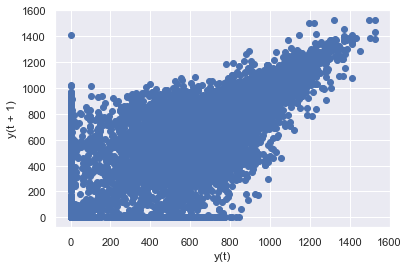

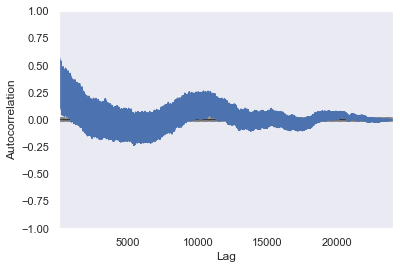

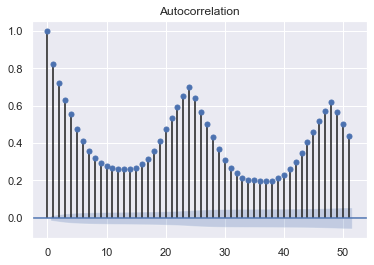

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 3.10344392e+01  5.28359928e-01  1.26691212e-01  4.33218117e-02
  2.79993886e-02  1.11309497e-02 -1.08235251e-03  6.89850835e-03
  1.65519563e-02 -4.71560334e-06  7.91917567e-03  8.42959072e-03
 -1.94909381e-03  3.74477438e-03  7.46852581e-05 -4.93648165e-03
  4.22872858e-03 -1.12466811e-02  8.67205348e-03  2.30556137e-02
  1.88120696e-02  1.23392279e-02  1.73389517e-02  6.21904384e-02
  2.84386776e-01 -1.02582244e-01 -7.48239719e-02 -4.48149104e-02
 -9.75961098e-03 -2.01264351e-02 -2.75522476e-02 -7.43557730e-03
 -5.77174668e-03 -1.43948319e-02 -9.84317403e-03  1.96617616e-02
 -4.16098376e-04  2.25173128e-03 -2.03340991e-02 -9.57451920e-04
  7.25364182e-03 -3.97483664e-03 -1.43097257e-02 -2.44150475e-03
  3.73418740e-03 -1.10799407e-02  2.82333660e-02  7.74357359e-02]
The lag value chose is: 47
AIC: 9.720, HQIC: 9.726, BIC: 9.737
Test RMSE: 233.178
predicted=551.132368, expected=505.000000
predicted=384.001792, expected=519.000000
predicted=284.419219, expected=199.0000

0.2857311982146381

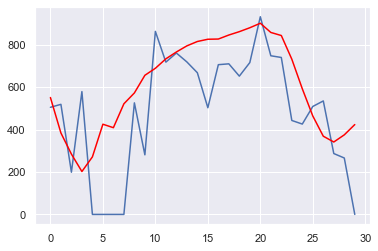

In [312]:
#UES_intraday_price UES_Siberia

create_data(intraday_price, "UES_Siberia")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


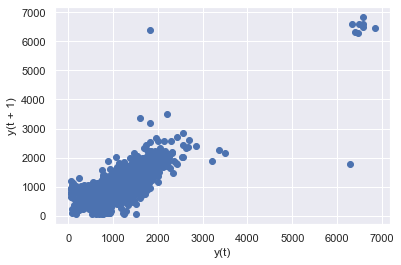

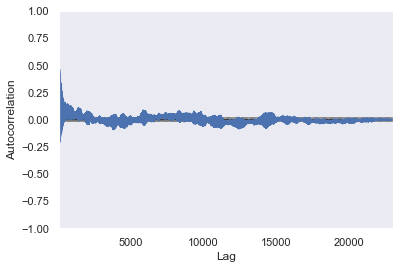

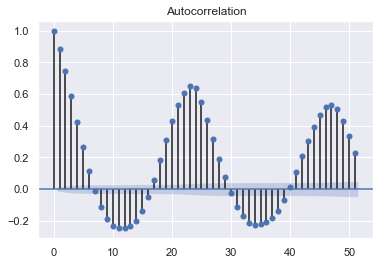

/Users/user/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tsa/ar_model.py:791: FutureWarning: 
statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)

  warnings.warn(AR_DEPRECATION_WARN, FutureW

Coefficients: [ 8.31315048e+01  8.52352509e-01 -1.50219194e-02  2.94450789e-03
 -2.35618398e-02 -1.83550684e-02 -2.52511291e-02 -1.16378659e-05
  1.02563207e-02 -4.33116327e-02  1.81310960e-02  2.37436419e-02
  4.88906323e-03 -3.31953245e-02 -3.29384265e-02  1.89383522e-02
 -5.66975266e-03  7.86526816e-04  5.22576333e-02  2.22835199e-02
  9.44805792e-03  1.11664650e-02  3.00576260e-02  8.21201369e-02
  1.03604168e-01 -1.36950478e-01 -5.57471678e-02  6.35908787e-03
  3.44122438e-03 -6.06426782e-04  4.82859858e-03 -1.43494168e-02
  1.62759764e-02  6.01371190e-03  1.25683420e-03  9.37477834e-03
  6.72586249e-03 -1.29939555e-03 -1.57867507e-02  2.53756350e-03
 -2.75320240e-03  4.56351862e-03 -2.90471478e-02  2.09831501e-02
 -2.33686262e-02  2.38622830e-02  1.06957172e-02  4.97812010e-02]
The lag value chose is: 47
AIC: 9.836, HQIC: 9.841, BIC: 9.853
Test RMSE: 210.349
predicted=1243.223075, expected=1191.000000
predicted=1273.231821, expected=1237.000000
predicted=1300.770343, expected=123

-0.409763420981208

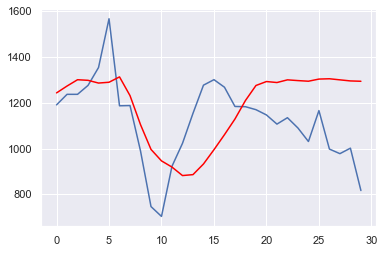

In [114]:
#UES_intraday_price UES_Center

create_data(intraday_price, "UES_Center")
plot_lag(new_data)
corr_coef(new_data)
autocorrelation(new_data)
acf(new_data)
AutoRegres(new_data)